# Contenidos

1. [Introducción](#intro)  
2. [Importación y primeros pasos](#pp)  
3. [Visualizaciones con Pandas y seaborn](#pdSns)  
4. [Conclusión](#conclu)

# Introducción<a id="intro"></a>

Lograr visualizaciones (plots) informativas es de gran importancia en análisis de datos. Su aplicación en este campo es transversal, abarcando desde la parte exploratoria, para por ejemplo, identificación de outliers o búsqueda de transformaciones en las variables. Por otra parte, las visualizaciones son una manera natural de mostrar los resultados obtenidos y facilitar la interpretación de los fenómenos estudiados. En Python existen librerías capaces de producir visualizaciones de manera intuitiva tanto estáticas como dinámicas, en este ámbito, la librería raíz es `matplotlib`. Tal librería está diseñada para la creación de visualizaciones de alta calidad para publicaciones. 


`Matplotlib` puede exportar visualizaciones en formatos vectorizados y comprimidos como son PDF, SVG, JPG, PNG, GIF , entre otros. Existe una extensa variedad de librerías gráficas basadas en `matplotlib`, una de ellas es `seaborn`, la cual también se explora en este capítulo.

# Importación y primeros pasos<a id="pp"></a> 

Como con NumPy y Pandas, existe una convención a la hora de importar esta librería:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

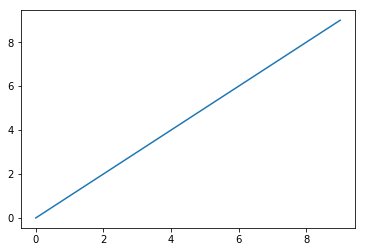

In [2]:
import numpy as np
data = np.arange(10)
plt.plot(data)

Para trabajar de manera interactiva, la linea mágica:
```
%matplotlib notebook

```
Toma provecho de las capacidades del proyecto Jupyter.

<IPython.core.display.Javascript object>


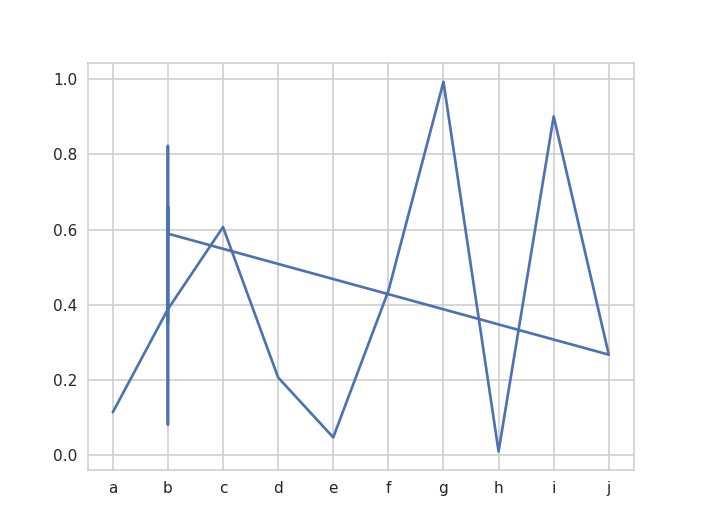

In [59]:
%matplotlib notebook
plt.plot(data)

## Figuras y subplots

Las visualizaciones `plots` en matplotlib actúan dentro de un objeto más general denominado figura o `figure`. Es posible crear un objeto `figure` vacío para luego agregar las visualizaciones deseadas a través de:

```python
fig = plt.figure()

```
Esto genera una ventana vacía, no obstante, es posible modificar opciones del objeto `fig` declarado anteriormente. Dentro de estas opciones se encuentra `figsize` la cual permite indicar el tamaño y relación de aspecto al momento de almacenar la visualización en el disco.

Para insertar visualizaciones dentro de la figura recién creada, es necesario añadir un `subplot`, el método `add_subplot` permite agregar múltiples visualizaciones a la figura en la cual se invoca.

<IPython.core.display.Javascript object>


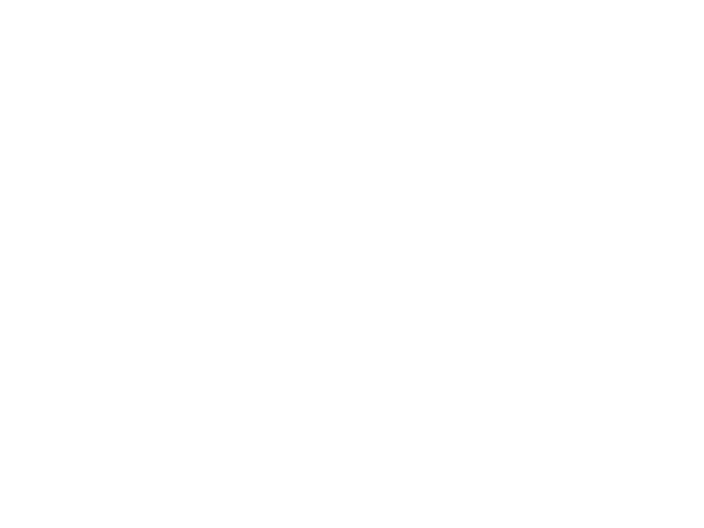

In [60]:
fig = plt.figure()

In [5]:
ax1 = fig.add_subplot(2,2,1)

El comando anterior indica que la figura tiene una estructura que comprende 2 visualizaciones por fila y 2 por columna, es decir la figura comprenderá 4 subfiguras de las cuales se selecciona la primera y se almacena como `ax1`.

**Ejercicio**

* Agregue 2 subfiguras a la figura `fig`. estas deben estar en la esquina superior derecha e inferior izquierda. Denote estas subfiguras como `ax2` y `ax3`.

Observación: En Jupyter, los plots se reinician luego de cada evaluación de celda, por lo tanto para obtener el esquema de subfiguras solicitado, debe declarar la figura y todos los subplots en la misma celda.

<IPython.core.display.Javascript object>


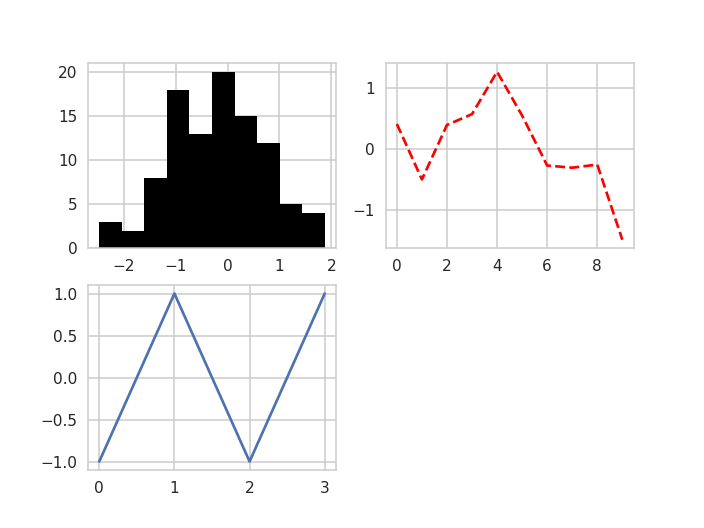

In [61]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Al agregar un comando de visualización como por ejemplo:
```pyhton
plt.plot([-1,1,-1,1])
```
matplotlib modificará la última figura creada en su último subplot, en caso de ser una figura vacía, se creará un nuevo subplot en ella. Por lo tanto, al evaluar el código anterior, se deberá agregar una figura con forma de "N" en el último subplot del ejercicio anterior.

In [62]:
plt.plot([-1,1,-1,1])

Por otra parte, es posible añadir visualizaciones en los demás subplots usando las variables antes almacenadas:

In [63]:
ax2.plot(np.random.randn(10), 'r--')

En tal caso, se indicó generar el gráfico de una variable aleatoria normal estándar, de la cual se extraen 10 muestras. El comando `r--` indica que el gráfico debe ser rojo, con líneas "cortadas" y posicionado en el subplot `ax2`.

**Ejercicio**

* Genere un arreglo aleatorio de dimensión 100, explore con tal arreglo  el método `hist`. ¿Qué función cumple el parámetro `alpha`?

* Estudie el método `scatter`. ¿En qué se diferencia al método `plot`?


In [64]:
ax1.hist(np.random.randn(100),color='k',alpha=1)

(array([  3.,   2.,   8.,  18.,  13.,  20.,  15.,  12.,   5.,   4.]),
 array([-2.47236786, -2.03786789, -1.60336792, -1.16886795, -0.73436798,
        -0.29986801,  0.13463196,  0.56913193,  1.0036319 ,  1.43813187,
         1.87263184]),
 <a list of 10 Patch objects>)

Otra manera de obtener figuras compuestas de subplots es a través del método `plt.subplots`, este entrega como `return` una figura y un arreglo NumPy con los objetos `subplot` en su interior:
```python
fig, axes = plt.subplots(2,3)
```

<IPython.core.display.Javascript object>


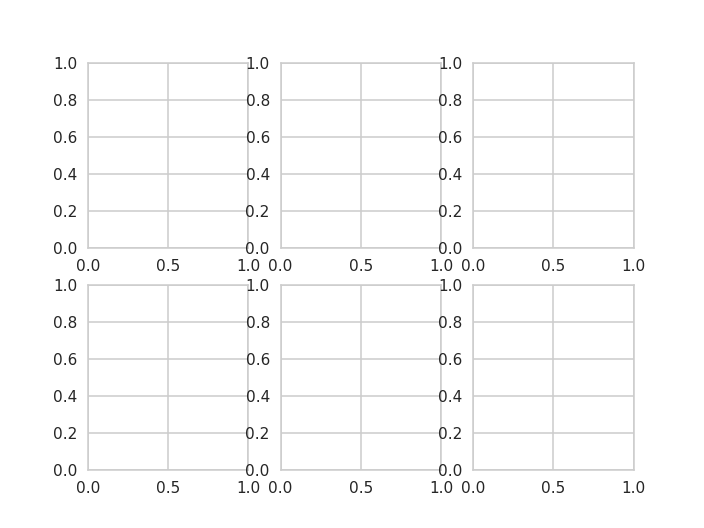

In [65]:
fig, axes = plt.subplots(2,3)

In [11]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdf7248e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efdf7163828>]], dtype=object)

En cuanto a la variable `axes` esta presenta la facilidad de ser accedida como un arreglo de dos dimensiones, por ejemplo:

In [66]:
axes[0,1]

permite acceder al primer subplot de la segunda columna de la figura `fig`.

**Ejercicio**

* Utilice la notación anterior para graficar solo en los subplots correspondientes a la esquina inferior izquierda y esquina superior derecha.

* Una opción bastante útil es la de mantener la misma escala en cada subplot de la figura creada. Explore las opciones `sharex` y `sharey`. ¿Cómo se comporta matplotlib al no indicar estas opciones ?

## Ajustes de espaciado en subplots

Por defecto, matplotlib maneja de manera automática el espacio alrededor de cada subplot. Esto se hace de manera relativa y en función a las dimensiones de la figura, sin embargo, es posible modificar esta opción utilizando `subplots_adjust` en objetos del tipo `Figure`:

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
``` 

En este contexto, las variables `wspace` y `hspace` controlan el porcentaje de ancho (width) y alto (height) que se debe utilizar entre subplots. 

**Ejercicio**

* Genere una figura con 4 histogramas, todas las subfiguras deben estar adyacentes unas con otras (no debe haber espacio entre ellas). (Hint: genere los histogramas usando 2 ciclos `for` anidados)

<IPython.core.display.Javascript object>


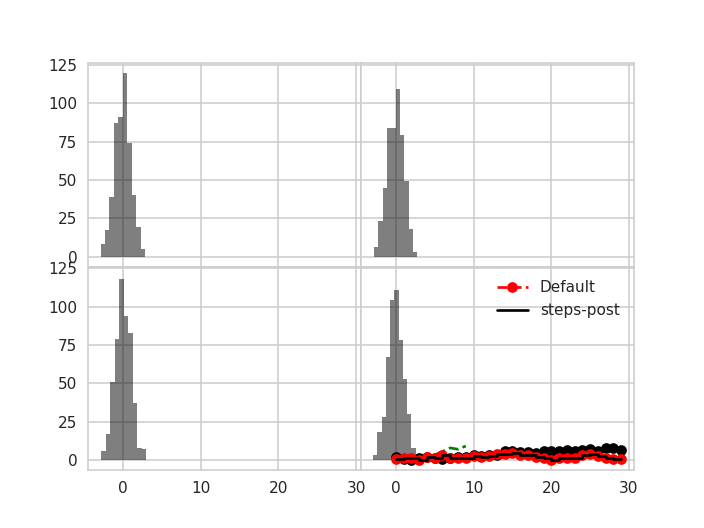

In [67]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [14]:
import matplotlib.pyplot as plt

## Colores, marcadores y estilos de línea

La función de visualización principal de matplotlib `plot` permite ingresar arreglos de coordenadas `x` e `y`, en este caso, para producir un gráfico color verde con líneas o "dashes" se puede ingresar un arreglo `X` y un arreglo `Y` ambos de la misma dimensión y ejecutar:

```python
ax.plot(X,Y,'g--')
```

Donde `ax` es un subplot antes declarado. La notación anterior es una versión comprimida de las opciones `linesyle='--'` y `color='g'` de tal manera que el comando anterior equivale a ingresar:

```python
ax.plot(X,Y,linestyle = '--', color = 'g')
```

**Ejericio** 

* Compruebe lo antes descrito.

In [68]:
X = np.arange(10)
Y = X + np.random.randn(10)

fig = plt.plot(X,Y,linestyle = '--', color = 'g')

En matplotlib es posible personalizar los colores que se desea obtener en un gráfico, los colores más usados poseen su propia abreviación por ejemplo `'g'` se refiere a verde, `'k'` a negro, `'r'` a rojo, etc ...

Si se desea ser aún más especifico, es posible ingresar un código hex para el color que se desea visualizar:

**Ejercicio**

* Cambie el color del gráfico anterior por uno en código hex de su elección.

Adicionalmente los plots pueden tener *marcadores* para resaltar las coordenadas correspondientes a los datos. Esto, debido a que la función `plot` genera una línea continua entre los puntos que se ingresan, por tanto, puede aparecer la necesidad de especificar las ubicaciones de los datos reales proporcionados. Los marcadores se acceden a través de la opción `marker` de la función `plot`, la siguiente [referencia](https://matplotlib.org/api/markers_api.htmlreferencia) proporciona los marcadores disponibles. Se puede acceder también a la notación simplificada utilizando por ejemplo:

```python
plt.plot(np.random.randn(30).cumsum(), 'ko-')
```
Donde el marcador es 'o' el color es negro y el tipo de línea es continuo.

In [69]:
plt.plot(np.random.randn(30).cumsum(), 'ko-')

Como se puede observar, la interpretación entre los puntos del gráfico es hecha de manera lineal, esto se puede personalizar con la opción `drawstyle`, la siguiente [referencia](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_drawstyle) muestra los tipos de interpolación disponibles. 

En el siguiente ejemplo se especifica además la etiqueta o `label` de cada "línea" graficada:

In [70]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'ro--', label='Default')
plt.plot(data, 'k-' , drawstyle='steps-post', label='steps-post')
plt.legend()

Al final del ejemplo se ejecuta el comando `legend`, el cual indica que se de deben mostrar los objetos del tipo `label` declarados con la opción `label` en la función `plot`. En el caso de graficar sobre un subplot `ax` se puede llamar el método `ax.legend`.

## Ejes, etiquetas y leyendas


Para personalizar los valores mostrados en el eje `x`, es posible usar las opciones `set_xticks` y `set_xticklabels`:

<IPython.core.display.Javascript object>


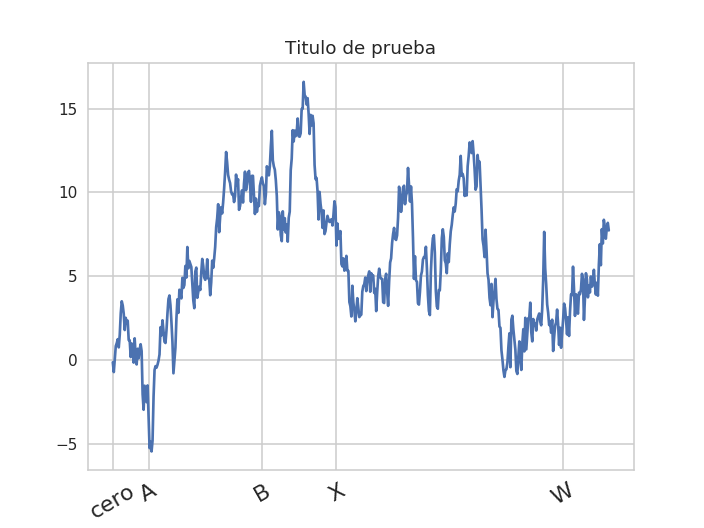

In [71]:
# Genera una serie aleatoria

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(500).cumsum())

# Selecciona los puntos de interes en el eje x
ticks = ax.set_xticks([0, 36,150, 225, 453])


# Cambia los nombres de los valores en el eje

labels = ax.set_xticklabels(['cero','A','B','X','W'], rotation=30, fontsize='large')

Es también posible agregar un titulo a la visualización, para ello se llama la función`set_title`:

In [72]:
ax.set_title('Titulo de prueba')

Text(0.5,1,'Titulo de prueba')

**Ejercicio**

* Utilice el método `set_xlabel` para dar un nombre al eje `x` del plot anterior.


Modificar el eje `y` consiste en el mismo procedimiento antes descrito.

 Los objetos definidos por el método `add_subplots` se denominan `axes`, estos, como clase, poseen el método `set` que permite ingresar sus propiedades a través de un diccionario. En el caso anterior es posible configurar el subplot `ax` por medio de:


In [73]:
ops = {
    'title':'Titulo de prueba',
    'xlabel':'Ejercicio'
}

ax.set(**ops)

[Text(0.5,-0.171063,'Ejercicio'), Text(0.5,1,'Titulo de prueba')]

Se debe indicar el diccionario antes descrito utilizando como llaves los campos que se deseen ingresar, además se debe utilizar doble asterisco `**` al llamar el método `set`, esto pues la declaración de tal método recibe un diccionario con variables "identificadas por nombre" como entrada. En declaración de funciones esto se denota con el uso de variables `**kwars`.

## Leyendas

Las leyendas corresponden al elemento principal de identificación de gráficos. Anteriormente se utilizó esta opción, en esta sección se estudia con más detalle.

La manera más sencilla de agregar una leyenda, cosiste en primero crear una etiqueta pasando la opción `label` al crear la visualización de interés para luego llamar el método `legend`.

<IPython.core.display.Javascript object>


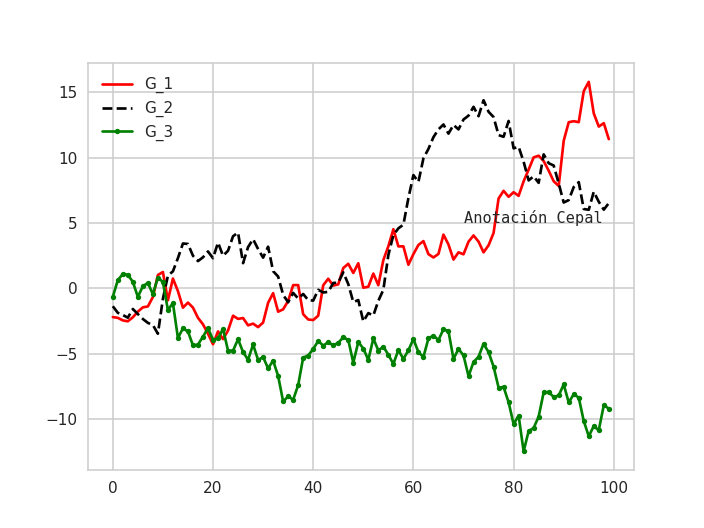

In [74]:
%matplotlib notebook 
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(100).cumsum(),'r'  , label='G_1')
ax.plot(randn(100).cumsum(),'k--', label='G_2')
ax.plot(randn(100).cumsum(),'g.-' , label='G_3')

ax.legend()

Como es de esperar, el método `legend` tiene opciones adicionales para, por ejemplo, controlar la posición de las legendas.

In [75]:
ax.legend?

## Anotaciones y figuras sobre un subplot

Hasta ahora, las visualizaciones generadas corresponden a figuras más bien estándar. En caso de querer agregar anotaciones adicionales, consistentes de texto, flechas u otras formas, es posible usar los métodos `text`, `arrow` y `annotate`. 

`text` genera un texto en las coordenadas (x,y) a elección, este método también presenta opciones extras sobre el estilo:

```python
ax.text(10,5,'Anotación Cepal', family='monospace', fontsize='10')
```

In [76]:
ax.text(70,5,'Anotación Cepal', family='monospace', fontsize='10')

Text(70,5,'Anotación Cepal')

Las anotaciones pueden también dibujar flechas con texto informativo. A modo de ejemplo se analizan los datos 

```
pip install datachile
```


## Qué es DataChile ?

https://es.datachile.io/

In [77]:
from datachile import ChileCube

client = ChileCube()
cube =  "psu"

dd = client.get_drilldowns(cube)
print(dd)

[{'dimension': 'Date', 'hierarchy': 'Date', 'level': 'Year', 'drilldown': ['Date', 'Date', 'Year'], 'mdx': '[Date].[Year]'}, {'dimension': 'Geography', 'hierarchy': 'Geography', 'level': 'Region', 'drilldown': ['Geography', 'Geography', 'Region'], 'mdx': '[Geography].[Region]'}, {'dimension': 'Geography', 'hierarchy': 'Geography', 'level': 'Comuna', 'drilldown': ['Geography', 'Geography', 'Comuna'], 'mdx': '[Geography].[Comuna]'}, {'dimension': 'Sex', 'hierarchy': 'Sex', 'level': 'Sex', 'drilldown': ['Sex', 'Sex', 'Sex'], 'mdx': '[Sex].[Sex]'}, {'dimension': 'Calculated PSU Bucket', 'hierarchy': 'Calculated PSU Bucket', 'level': 'Bucket', 'drilldown': ['Calculated PSU Bucket', 'Calculated PSU Bucket', 'Bucket'], 'mdx': '[Calculated PSU Bucket].[Bucket]'}]


In [78]:
mbs = client.get_members(cube,'Date','Year')
print(mbs)

{'name': 'Year', 'full_name': '[Date].[Year]', 'depth': 1, 'caption': 'Year', 'annotations': {}, 'properties': [], 'members': [{'name': '2004', 'full_name': '[Date].[2004]', 'all_member?': False, 'drillable?': False, 'depth': 1, 'caption': '2004', 'key': 2004, 'num_children': 0, 'parent_name': '[Date].[All Dates]', 'level_name': 'Year', 'children': [], 'ancestors': [{'name': 'All Dates', 'full_name': '[Date].[All Dates]', 'all_member?': True, 'drillable?': True, 'depth': 0, 'caption': 'All Dates', 'key': 0, 'num_children': 13, 'parent_name': None, 'level_name': '(All)', 'children': []}]}, {'name': '2005', 'full_name': '[Date].[2005]', 'all_member?': False, 'drillable?': False, 'depth': 1, 'caption': '2005', 'key': 2005, 'num_children': 0, 'parent_name': '[Date].[All Dates]', 'level_name': 'Year', 'children': [], 'ancestors': [{'name': 'All Dates', 'full_name': '[Date].[All Dates]', 'all_member?': True, 'drillable?': True, 'depth': 0, 'caption': 'All Dates', 'key': 0, 'num_children': 13

In [79]:
ms = client.get_measures(cube)
print(ms)

[{'name': 'Number of records', 'caption': 'Number of records', 'annotations': {}, 'full_name': '[Measures].[Number of records]', 'aggregator': 'COUNT'}, {'name': 'Avg language test', 'caption': 'Avg language test', 'annotations': {}, 'full_name': '[Measures].[Avg language test]', 'aggregator': 'AVG'}, {'name': 'Avg math test', 'caption': 'Avg math test', 'annotations': {}, 'full_name': '[Measures].[Avg math test]', 'aggregator': 'AVG'}, {'name': 'PSU AVG individual', 'caption': 'PSU AVG individual', 'annotations': {}, 'full_name': '[Measures].[PSU AVG individual]', 'aggregator': 'SUM'}, {'name': 'PSU Average', 'caption': 'PSU Average', 'annotations': {'es_element_caption': 'PSU promedio'}, 'full_name': '[Measures].[PSU Average]', 'aggregator': 'UNKNOWN'}, {'name': 'PSU Rank', 'caption': 'PSU Rank', 'annotations': {}, 'full_name': '[Measures].[PSU Rank]', 'aggregator': 'UNKNOWN'}, {'name': 'PSU Rank Decile', 'caption': 'PSU Rank Decile', 'annotations': {}, 'full_name': '[Measures].[PSU 

In [80]:
query = client.get(
    "psu", 
    {"drilldowns": [
            ["Date","Year"],
            ["Sex","Sex"]
        ],
        "measures": ["PSU Average"],
        "cuts": [{
            "drilldown":["Date","Year"],
            "values": np.arange(2004,2017)
            }]
    }
)

In [81]:
# Importación y limpieza simple
data = pd.DataFrame(query['data'])
data = data.replace('No data', np.NaN)
data = data.dropna()

drop_cols = data.columns[:2]

In [82]:
data = data.drop(drop_cols, axis=1).reset_index()
data.drop('index', axis=1, inplace=True)

In [83]:
data.head(10)

,PSU Average,Sex,Year
0,492.052005,Female,2004
1,509.192998,Male,2004
2,491.173890,Female,2005
3,510.581295,Male,2005
4,492.264579,Female,2006
5,509.498421,Male,2006
6,491.893822,Female,2007
7,510.260617,Male,2007
8,491.322157,Female,2008
9,511.009268,Male,2008


In [84]:
male = data[data.Sex == 'Male']
female = data[data.Sex == 'Female']

male.index = male.Year
female.index = female.Year

In [85]:
male

,PSU Average,Sex,Year
Year,,,
2004,509.192998,Male,2004
2005,510.581295,Male,2005
2006,509.498421,Male,2006
2007,510.260617,Male,2007
2008,511.009268,Male,2008
2009,510.016240,Male,2009
2010,509.887460,Male,2010
2011,509.398537,Male,2011
2012,507.334637,Male,2012


Dentro del DataFrame generado se procederá a comparar la evolución de los puntajes promedio PSU para mujeres y hombres, para ello se genera una figura:

<IPython.core.display.Javascript object>


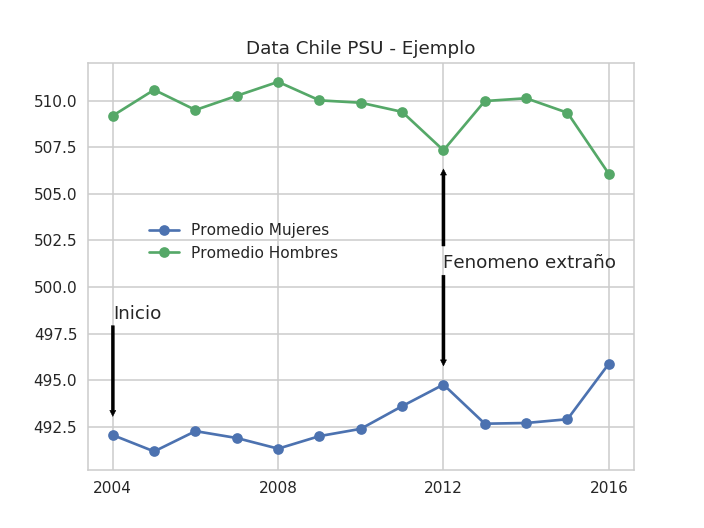

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

years = np.arange(2004,2017)

female = data[data.Sex == 'Female']
female.index = years

male   = data[data.Sex == 'Male']
male.index = years

ax.set_title("Data Chile PSU - Ejemplo")
ax.plot(years, female['PSU Average'],label='Promedio Mujeres',marker='o')
ax.plot(years, male['PSU Average'], label='Promedio Hombres',marker='o')
#ax.set_ylim((0,1000))

En tal figura se agrega una anotación para los años 2004 y 2012:

In [87]:
ax.set_xticks([2004, 2008,2012,2016])

anotaciones = [
    (2004,'Inicio'),
    (2012,'Fenomeno extraño')
]


for Y,L in anotaciones:
    ax.annotate(L, xy  = (Y, female.loc[Y]['PSU Average']+1), 
                xytext = (Y, female.loc[Y]['PSU Average']+7),
                arrowprops={
                            'facecolor':'black', 'headwidth':4,
                            'width':2, 'headlength':4
                            },
                horizontalalignment = 'left',
                verticalalignment='top'
               )
    
ax.annotate(' ', xy  = (2012, male.loc[2012]['PSU Average']-1), 
            xytext = (2012, male.loc[2012]['PSU Average']-5.3),
            arrowprops={
                        'facecolor':'black', 'headwidth':4,
                        'width':2, 'headlength':4
                        },
            horizontalalignment = 'left',
            verticalalignment='top'
           )

ax.legend(loc=(0.1,0.5))

**Ejercicio**

* Inserte un flecha desde el gráfico superior hacia la palabra "inicio" (use como referencia la doble flecha dibujada en el plot).

Además de añadir anotaciones, es posible agregar figuras, las figuras principales se denominan `patches`, alguno de estos son los rectángulos y círculos, en la documentación de `matplotlib.patches` se hace una recopilación de estos. A continuación se muestra un ejemplo:

<IPython.core.display.Javascript object>


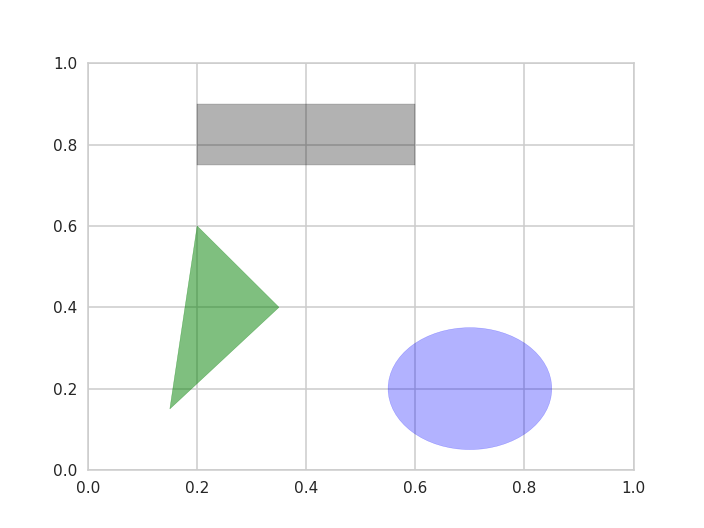

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Guardado de figuras

Es posible almacenar en el disco las figuras producidas, para ello, el método `plt.savefig` es usado. Por ejemplo, para almacenar una figura en formato `SVG` con el nombre `figura_text` se puede hacer con comando:
```python
plt.savefig('.../ruta/figura_test.SVG')

```

El tipo de archivo se infiere automáticamente de la extensión usada, los tipos de archivos soportados incluyen `png` y `pdf` entre otros. Algunas opciones de bastante utilidad son `dpi` y `bbox_inches`, el siguiente comando permite guardar un figura en formato `png` con 400 dpi y con el mínimo espacio alrededor del gráfico:

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

## Configuración de matplotlib

El paquete descrito hasta acá viene preconfigurado con esquemas de colores. Todos estos esquemas "por defecto" pueden ser personalizados extendiendo los parámetros globales de la librería. El método `rc`  permite hacer esto, por ejemplo, para cambiar el tamaño de las figura a 10x10 se puede ingresar:

```python
plt.rc('figure', figsize=(10,10))
```

El primer argumento de `rc` es el componente que se desea personalizar, en este caso es `figure`, se puede acceder también a `axes`, `xtick`, `ytick`, `grid`, `legend` entre otros. Luego se ingresan los parámetros que se deseen modificar, esto puede ser hecho a través de diccionarios:

```python
opt = {'family' : 'monospace',
       'weight' : 'bold',
       'size' : 'small'}
plt.rc('font', **opt)
```

# Visualizaciones con Pandas y seaborn<a id="pdSns"></a>

matplotlib se puede interpretar como una herramienta de "bajo nivel" para la producción de visualizaciones, es decir, esta se generan a partir de sus componentes básicos.

En Pandas por otra parte, los DataFrames pueden tener múltiples columnas además de etiquetas para las filas. Este paquete posee métodos de visualización incluidos, pensados para simplificar el proceso de producción a partir de Series y DataFrames. 

Otra librería basada en tal principio es `seaborn`, esta corresponde a una librería de gráficos estadísticos construida sobre matplotlib. A continuación se estudian las posibilidades de visualización tanto en pandas como en seaborn.

## Gráficos de línea

Las Series y Dataframes poseen atributo `plot`, este permite hacer gráficas simples, por defecto, este atributo genera gráficos de línea interpolados:

<IPython.core.display.Javascript object>


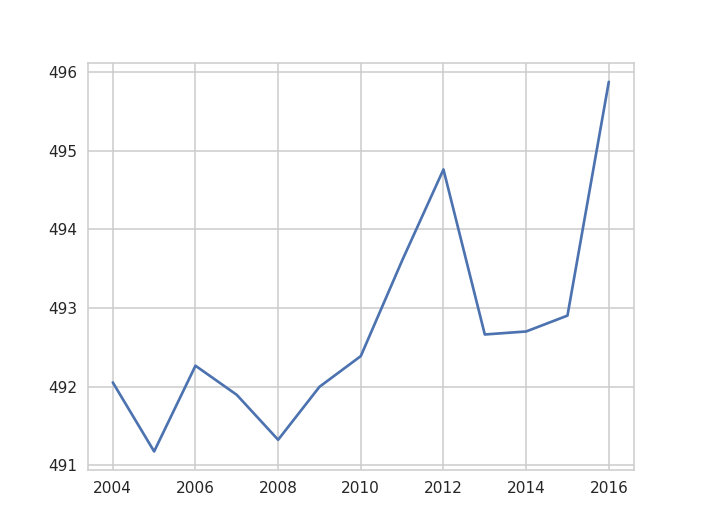

In [89]:
fig = plt.figure()
s = female['PSU Average']
s.plot()

Los indices del objeto serie son interpretados como el eje `x`, esto se puede evitar con `use_index = False`. El los puntos de interés en `x` o "ticks" y sus limites se pueden ajustar por medio de `xticks` y `xlim`, de la misma manera se puede ajustar el eje `y`. Las opciones disponibles se pueden acceder en la documentación del `plot`.

Por lo general, lo métodos de visualización en pandas permiten un parámetro `ax` el cual puede ser un subplot de matplotlib. 

El método `plot` en DataFrames genera un plot distinto para cada visualización produciendo una "linea" distinta por columna además de generar una leyenda de manera automática.

In [90]:
H = data.pivot_table(index=['Year', 'Sex']).unstack(1)
H.columns = ['female', 'male']

Data = H

<IPython.core.display.Javascript object>


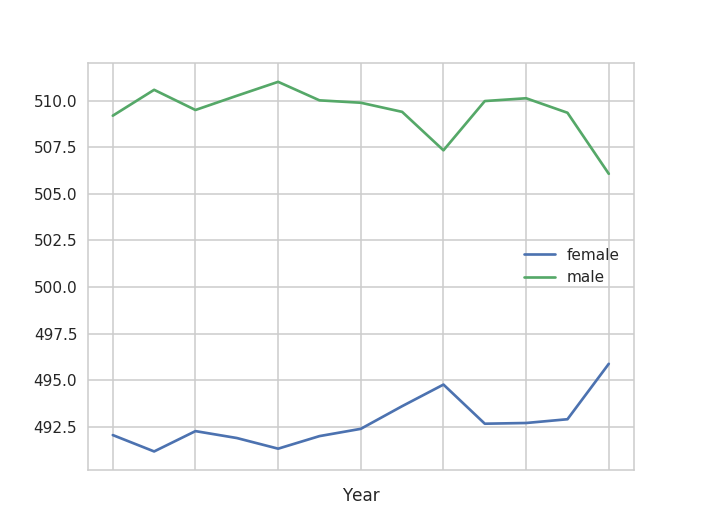

In [91]:
Data.plot()

Por su parte, el método `plot` de un DataFrame, posee opciones diferentes a las de una Serie, siendo `subplots` una de estas:

<IPython.core.display.Javascript object>


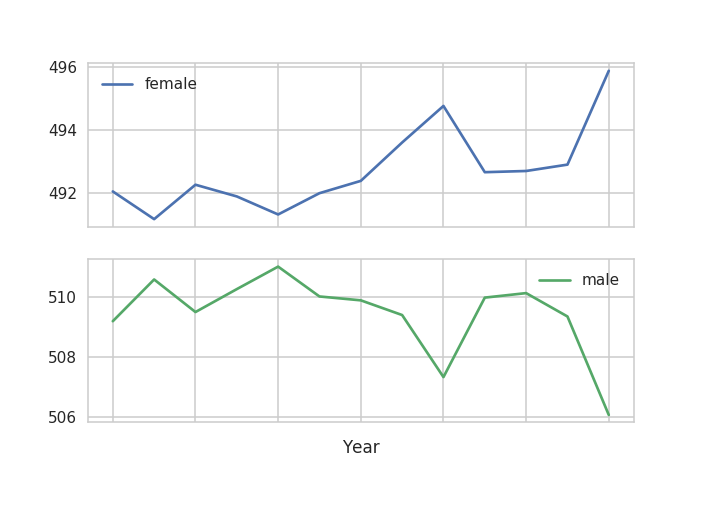

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efddd4976d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efddd3dcc18>], dtype=object)

In [92]:
Data.plot(subplots=True)

## Gráficos de barra

La función `plot.bar()` y `plot.barh()` generan gráficos de barra verticales y horizontales respectivamente. En esta caso, los índices ya sean de la Serie o DataFrame serán utilizados como el eje `x` (bar) o `y` (barh).

<IPython.core.display.Javascript object>


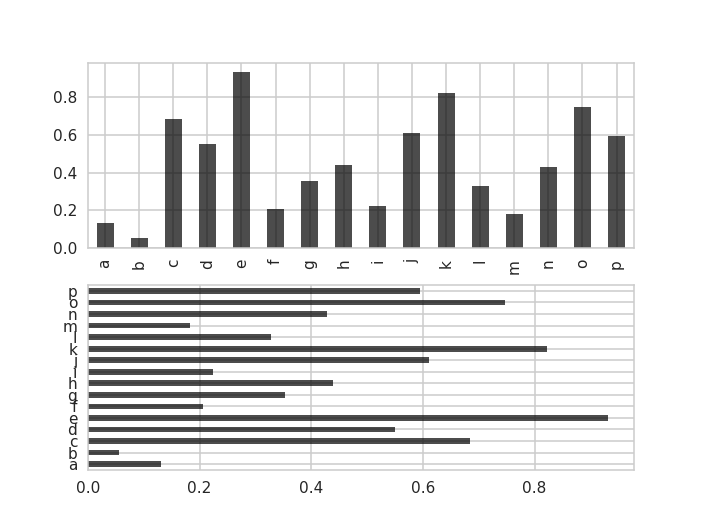

In [93]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Las opciones `color = 'k'` y `alpha=0.7` proporcionan tanto el color como la transparencia de las barras.

<IPython.core.display.Javascript object>


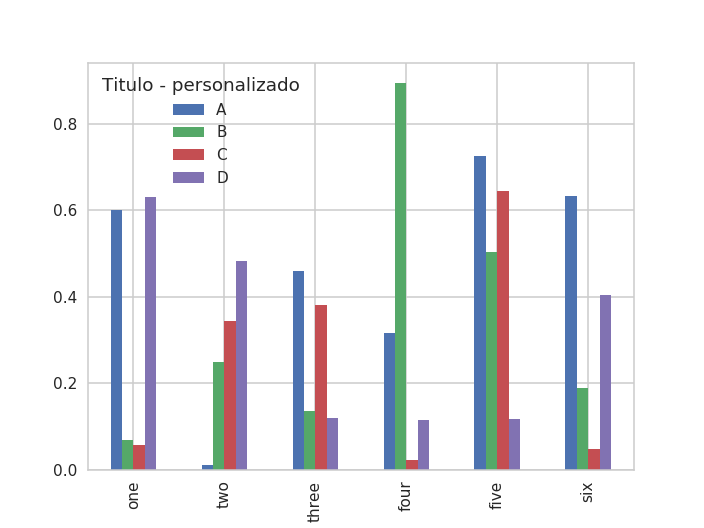

In [94]:
df = pd.DataFrame(np.random.rand(6, 4),

index=['one', 'two', 'three', 'four', 'five', 'six'],
columns=pd.Index(['A', 'B', 'C', 'D'], name='Titulo - personalizado'))

df.plot.bar()

Para crear gráficos de barra superpuestos a partir de un DataFrame la opción `stacked=True` lo permite de manera sencilla:

<IPython.core.display.Javascript object>


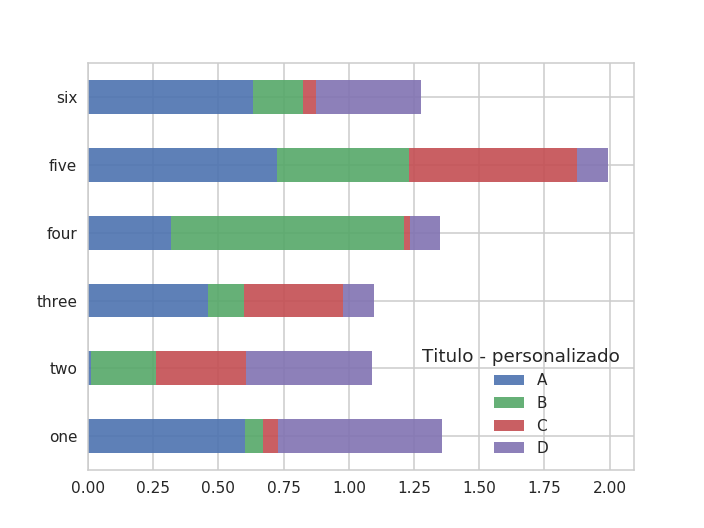

In [95]:
df.plot.barh(stacked=True, alpha=0.9)

**Ejercicio** 

* Genere un gráfico de barras horizontal, donde se muestren las frecuencias para los puntajes promedio PSU obtenidos por las mujeres separados en 5 grupos (o bins). (Hint: `value_counts`)

<IPython.core.display.Javascript object>


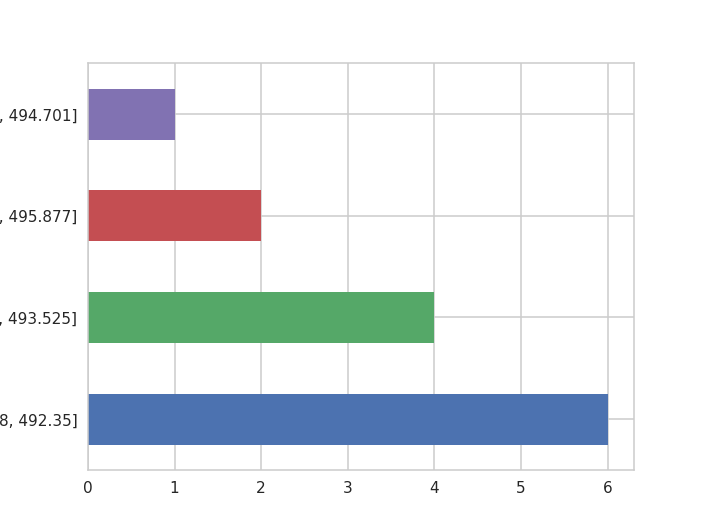

In [96]:
fig=plt.figure()
s_f = Data['female']
s_f.value_counts(bins=4).plot.barh()

Para hacer visualizaciones que requieran un agrupamiento previo exhaustivo de los datos, es posible usar `seaborn`:

<IPython.core.display.Javascript object>


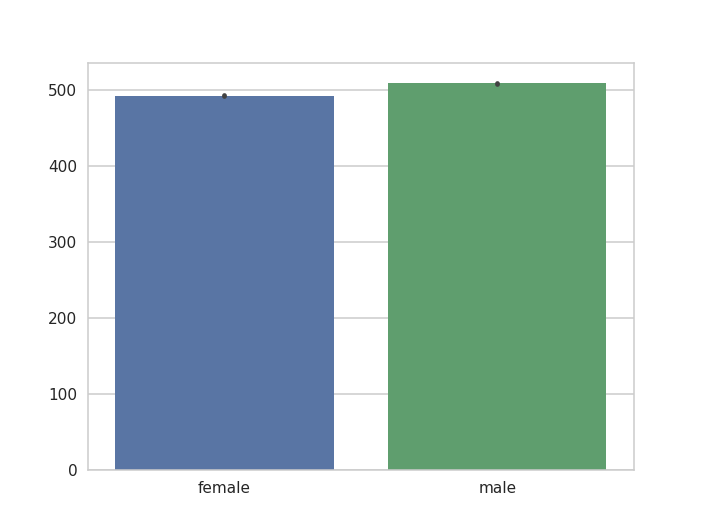

In [97]:
import seaborn as sns
fig=plt.figure()

sns.barplot(data=Data)

El argumento de barplot corresponde a un DataFrame u observaciones de un base de datos en arreglos `x` e `y`. En este caso, el gráfico corresponde a los valores promedio de los puntajes PSU tanto de hombres como de mujeres, además agrega un intervalo de confianza del 95% al valor (lineas negras).

Los barplots de seabron tiene además una opción denominada `hue` la cual permite separar a través de una nueva variable categórica. El siguiente ejemplo hace uso de esta opción utilizando los datos de efectividad en la educación básica obtenidos de la API DataChile.

In [98]:
# https://es.datachile.io/geo/chile#education 
# Efectividad en educación:

import pandas as pd
df_efect = pd.read_csv('./datos/C3/efectividad.csv')

# Limpieza inicial

df_efect.replace('Educación especial', np.NaN)
df_efect.dropna(inplace=True)

In [99]:
data_1 = pd.DataFrame(data=df_efect, columns=['Stage 1a','Avg efectiveness'])
data_1['bin'] = pd.cut(data_1['Avg efectiveness'], bins=5)

<IPython.core.display.Javascript object>


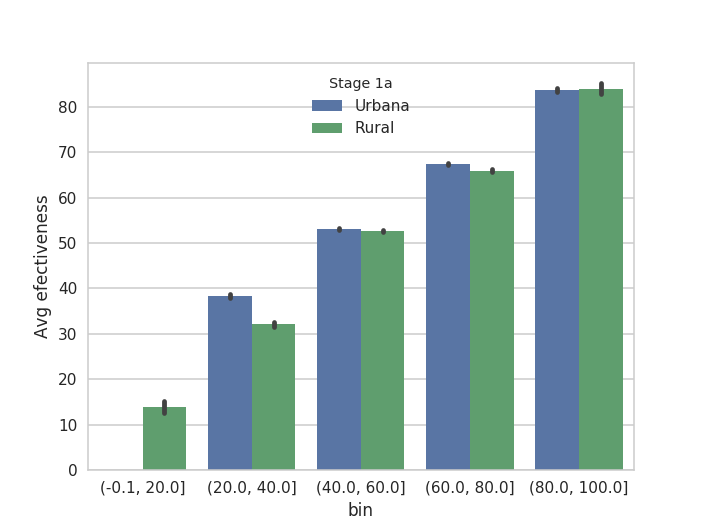

In [100]:
fig = plt.figure()
sns.barplot(x=data_1.bin, y=data_1['Avg efectiveness'], hue=data_1['Stage 1a'])

Es posible cambiar el estilo de los gráficos usando el método `set` de seaborn:

In [101]:
sns.set(style='whitegrid')

## Histogramas y gráficos de densidad

Un histograma es un tipo de gráfico de barras que proporciona un valor discretizado de las frecuencias. Para esto, se discretizan los valores presentes en la base de datos para luego ser separados en "bins", posteriormente se gráfica el número de veces que un bin es "poblado" por algún elemento de la base.

<IPython.core.display.Javascript object>


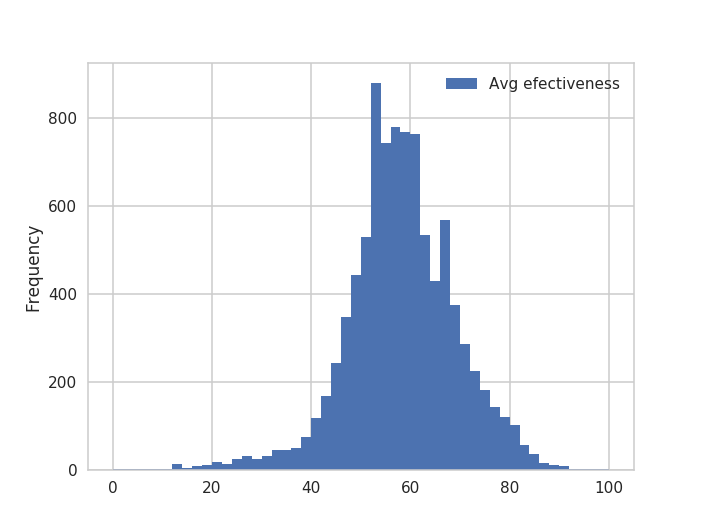

In [102]:
data_1.plot.hist(bins=50)

Un tipo relacionado de datos son los gráficos de densidad, estos calculan una estimación de la distribución de probabilidad que pudo haber generado los datos. El procedimiento usual para esto, es aproximar tal distribución por medio de una mezcla de "kernels", es decir, distribuciones más simples. Por tanto, los gráficos de densidad son conocido con el nombre de estimadores de densidad por kernels o KDE por sus siglas en ingles. Usando la función `plot.kde`  se puede obtener un KDE usando una mezcla de distribuciones normales:

<IPython.core.display.Javascript object>


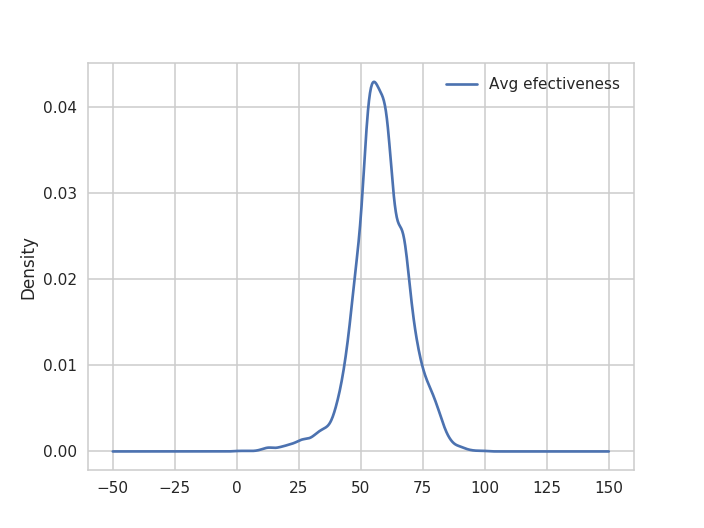

In [103]:
data_1.plot.density()

Seaborn produce histogramas y gráficos de densidad de manera aún más sencilla a través del método `distplot`, el cual genera tanto un histograma como un KDE continuo (de manera simultanea). A modo de ejemplo, se consideran dos distribuciones conocidas:

In [104]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


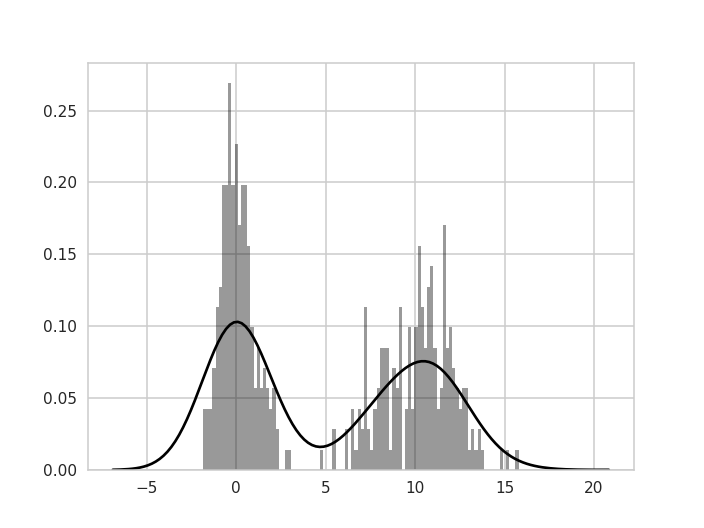

In [105]:
fig = plt.figure()
sns.distplot(values, bins=100, color='k')

## Gráficos de dispersión

Los gráficos compuestos de "puntos" o gráficos de dispersión puede ser una manera útil de examinar la relación entre datos 2-dimensionales. Por ejemplo, en los datos analizados en la `clase 1` se hace uso de tal ventaja:

**Ejercicio**

* Cargue los datos de la clase 1 './datos/C1/SCI_HDI.npy' en un DataFrame de pandas con columnas `SCI` y `HDI` respectivamente. Utilice la función `sns.regplot()` sobre estos datos.

In [106]:
datos=np.load('./datos/C1/SCI_HDI.npy')
datos = pd.DataFrame(datos, columns=['SCI', 'HDI'])
datos.head()

,SCI,HDI
0,51.111100,0.479
1,47.777767,0.533
2,72.222233,0.764
3,95.555567,0.827
4,93.333333,0.743


<IPython.core.display.Javascript object>


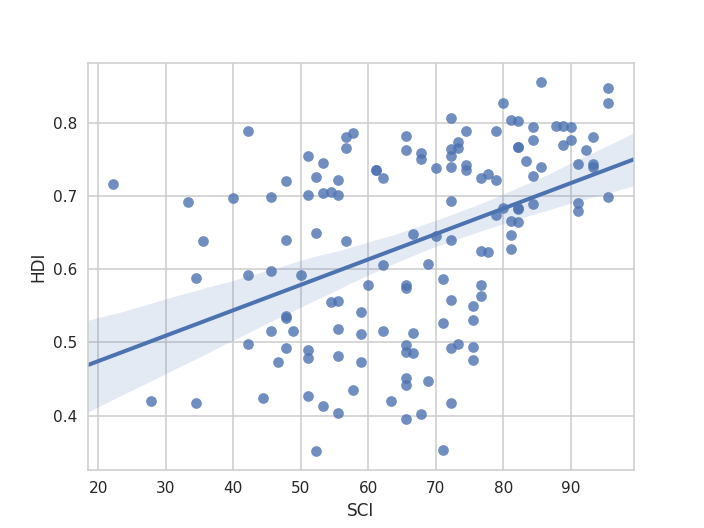

In [107]:
fig = plt.figure()
sns.regplot('SCI', 'HDI',data=datos)

Como pudo haber observado, tal función ajusta una regresión lineal sobre un gráfico de dispersión.

Otra herramienta importante en análisis de datos es la opción de analizar las relaciones entre las distintas variables que intervienen en el fenómeno que se estudia. Esto se puede hacer mediante el estudio de *gráficos de pares* o una **matriz de gráficos de dispersión**. Es posible generar gráficos de con tales características desde cero usando matplotlib, sin embargo, seaborn posee la función **pairplot** que soporta histogramas y KDE's de cada variable en la diagonal de la *matriz*.

<IPython.core.display.Javascript object>


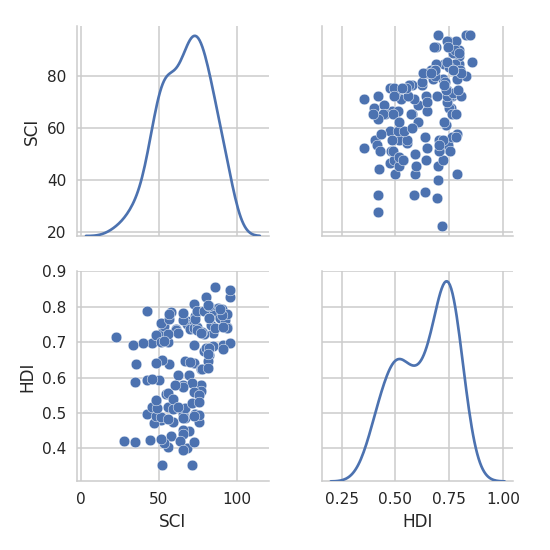

In [108]:
sns.pairplot(datos, diag_kind='kde')

Adicionalmente, es posible ingresar argumentos en forma de diccionario a través de la opción `plots_kws`, por ejemplo, si se quisiera agregar cierta transparencia: 
```python
sns.pairplot(arg_1, arg_2,...,plot_kws={'alpha': 0.2})
```

## Grillas y datos categóricos

Una manera de visualizar datos con múltiples variables categóricas es usando un "grilla de facetas". En seabron existe la función `factorplot` que simplifica la tarea:

<IPython.core.display.Javascript object>


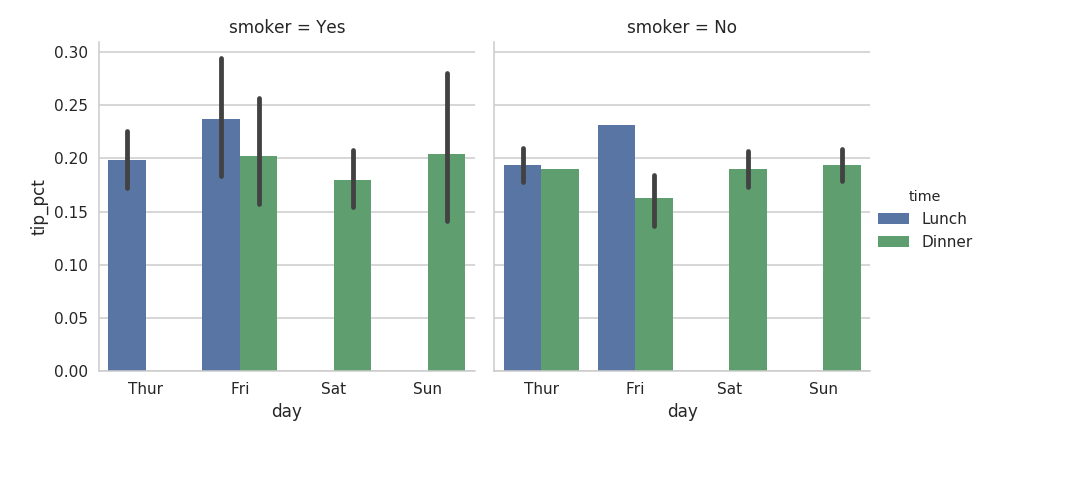

In [109]:
# Se carga la base de ejemplo "tips" presente como
# dataset de ejemplo en seaborn.

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

En vez de agrupar por `time` usando colores distintos colores de barras, se puede expandir una "grilla de facetas" agregando una fila por valor de `time`:

<IPython.core.display.Javascript object>


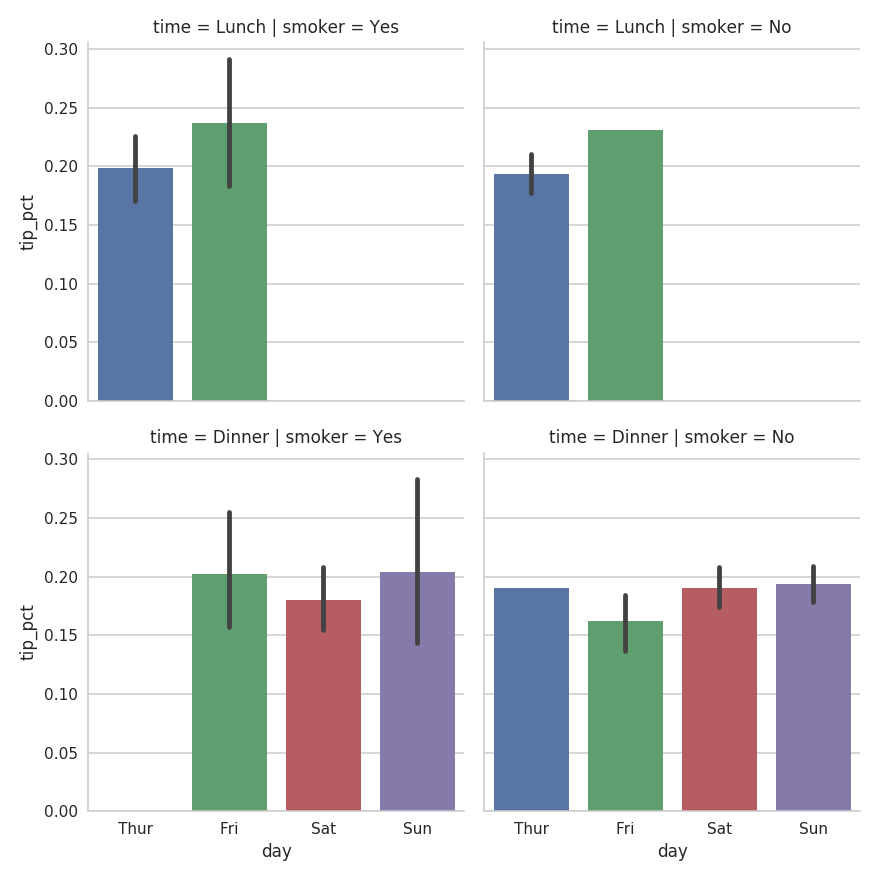

In [110]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
                  kind='bar', data=tips[tips.tip_pct < 1])

`factorplot` soporta también otros tipos de gráficos que pueden ser útiles dependiendo de la que se desee mostrar. Por ejemplo los gráficos de caja:

<IPython.core.display.Javascript object>


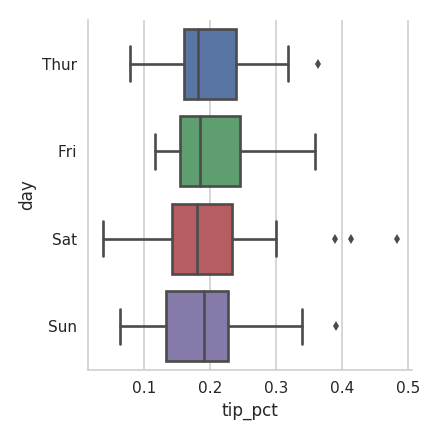

In [111]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

**Ejercicio**

* Estudie el tipo de gráfico conocido domo 'violin'.

## Conclusión<a id="conclu"></a> 

matplotlib se puede interpretar como una librería de "bajo nivel" en la producción de visualizaciones, por tal motivo proporciona una gran cantidad de opciones de personalización. Por otra parte, herramientas de más alto nivel, como las proporcionadas por Pandas y seaborn permiten obtener gráficos altamente expresivos y de gran calidad de una manera más sencilla, pagando como costo cierta pérdida en la personalización. Debido a la alta interacción entre estas librerías, se recomienda conocer las funciones y atributos basales presentes en matplotlib y usarlas en conjunto a "interfaces" de más alto nivel como seaborn para agregar expresividad a las visualizaciones. Finalmente, estas no son las únicas herramientas construidas sobre matplotlib, se sugiere como tema de estudio, el investigar las herramientas de visualizaciones dinámicas conocidas como bokeh y plotly.